In [1]:
#pip install prophet
# https://facebook.github.io/prophet/docs/quick_start.html

# 1. Import Dependencies

In [2]:
import pandas as pd
from prophet import Prophet

# 2. Load Data

In [3]:
#pd.read_csv??
df = pd.read_csv('TESLA_MODEL')

In [4]:
df.head()

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [5]:
df.dtypes

Date               int64
Store/Product     object
Value            float64
dtype: object

# 3. Apply Data Preprocessing

In [6]:
#To convert date to dateTime we use parse

df = pd.read_csv('TESLA_MODEL', parse_dates=['Date'])
df.dtypes

Date             datetime64[ns]
Store/Product            object
Value                   float64
dtype: object

In [7]:
#To convert date to dateTime we can also use parse

#df['Date'] = pd.to_datetime(df['Date'])
#df.dtypes

In [8]:
df.head()

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [9]:
df.describe()

,Value
count,3240.000000
mean,4071.492169
std,1479.550399
min,1886.532150
25%,2661.150000
50%,4066.854655
75%,5324.965550
max,8989.513560


# isolating the date is essential when using Prophet

In [10]:
frame= df[df['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_X'].copy()

In [11]:
#So here we are isolating the dat only where Store/Product = LOS_ANGELES-TESLA_MODEL_X

In [12]:
frame.drop('Store/Product', axis=1, inplace=True)

In [13]:
frame.head()

,Date,Value
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [14]:
#Now we just rename the columns name just to simplify the things

frame.columns = ['ds', 'y']

In [15]:
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [16]:
frame.isnull().sum()

ds    0
y     0
dtype: int64

In [17]:
frame.describe()

,y
count,1080.000000
mean,4048.117478
std,1439.945783
min,2042.813500
25%,2632.498599
50%,4256.000000
75%,5288.248910
max,8147.739600


# 4. Create Time Series Model

In [18]:
model = Prophet(interval_width=0.95)

In [19]:
training_model = model.fit(frame)

11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:16 - cmdstanpy - INFO - Chain [1] done processing


# 5. Evaluate Model

In [20]:
future = model.make_future_dataframe(periods=1000, freq='D')

In [21]:
future.tail()

,ds
2075,2023-09-08
2076,2023-09-09
2077,2023-09-10
2078,2023-09-11
2079,2023-09-12


In [22]:
forecast = model.predict(future)

In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2075,2023-09-08,5675.693725,5252.231768,8313.833352,5576.727060,5764.922212,1216.916162,1216.916162,1216.916162,-34.595431,-34.595431,-34.595431,1251.511593,1251.511593,1251.511593,0.0,0.0,0.0,6892.609887
2076,2023-09-09,5676.769666,5261.488081,8613.010239,5577.637009,5766.095642,1240.119794,1240.119794,1240.119794,-14.017019,-14.017019,-14.017019,1254.136813,1254.136813,1254.136813,0.0,0.0,0.0,6916.889461
2077,2023-09-10,5677.845608,5351.769370,8590.229687,5578.546959,5767.269072,1283.568531,1283.568531,1283.568531,25.188823,25.188823,25.188823,1258.379707,1258.379707,1258.379707,0.0,0.0,0.0,6961.414138
2078,2023-09-11,5678.921549,5365.820650,8644.474298,5579.456909,5768.442345,1280.988615,1280.988615,1280.988615,16.627615,16.627615,16.627615,1264.361000,1264.361000,1264.361000,0.0,0.0,0.0,6959.910164
2079,2023-09-12,5679.997490,5330.384550,8647.601119,5580.366859,5769.615461,1260.854002,1260.854002,1260.854002,-11.270418,-11.270418,-11.270418,1272.124420,1272.124420,1272.124420,0.0,0.0,0.0,6940.851492


In [24]:
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [25]:
#So we can see the future predction, Just we can compare with y value in 2018 and yhat value from forecasted value

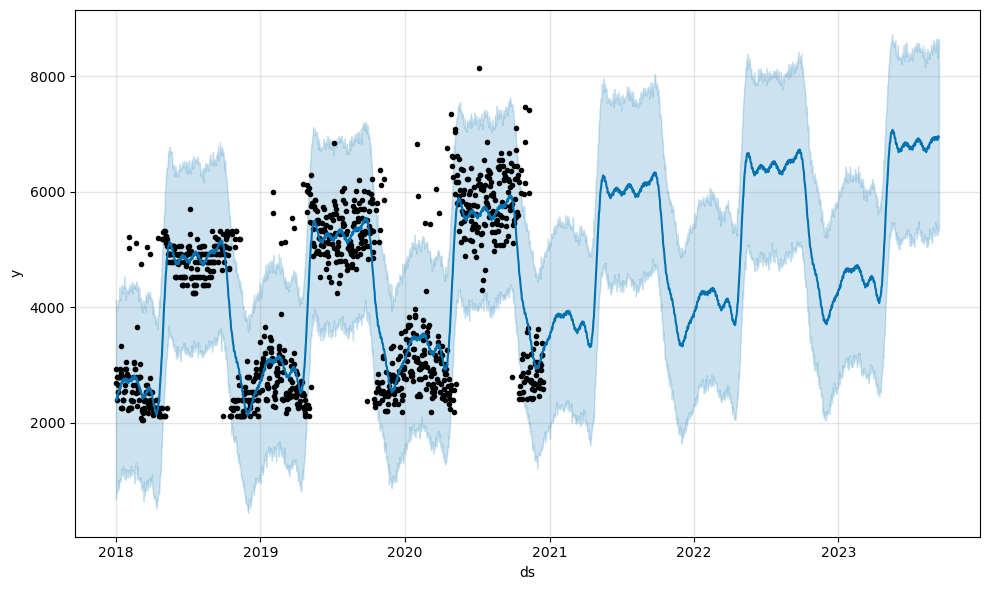

In [26]:
plot1 = model.plot(forecast)

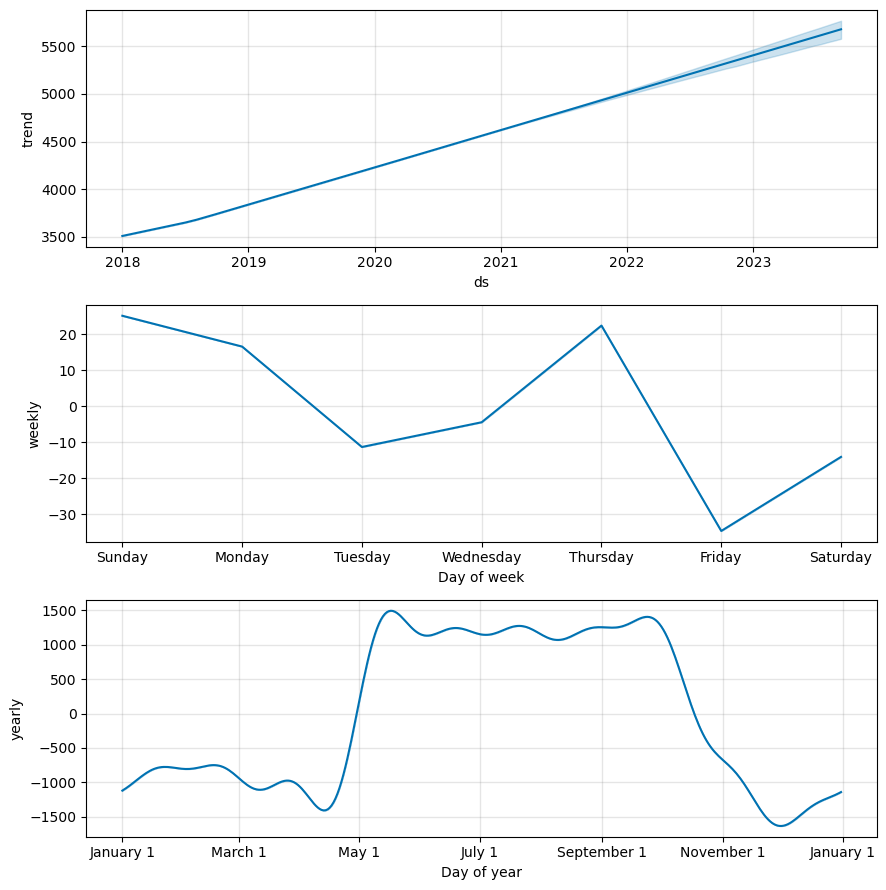

In [27]:
plot2 = model.plot_components(forecast)

# Scaling Up

In [28]:
lines = df['Store/Product'].unique()
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

In [29]:
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    print(frame.tail())

           Date              Store/Product        Value
1075 2020-12-12  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1076 2020-12-13  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1077 2020-12-14  LOS_ANGELES-TESLA_MODEL_X  3383.354511
1078 2020-12-15  LOS_ANGELES-TESLA_MODEL_X  2714.591329
1079 2020-12-16  LOS_ANGELES-TESLA_MODEL_X  2585.035107
           Date              Store/Product        Value
2155 2020-12-12  LOS_ANGELES-TESLA_MODEL_S  3501.353950
2156 2020-12-13  LOS_ANGELES-TESLA_MODEL_S  3505.353950
2157 2020-12-14  LOS_ANGELES-TESLA_MODEL_S  3751.689962
2158 2020-12-15  LOS_ANGELES-TESLA_MODEL_S  3008.050462
2159 2020-12-16  LOS_ANGELES-TESLA_MODEL_S  2866.538618
           Date                Store/Product        Value
3235 2020-12-12  SAN_FRANCISCO-TESLA_MODEL_S  2899.835050
3236 2020-12-13  SAN_FRANCISCO-TESLA_MODEL_S  2896.835050
3237 2020-12-14  SAN_FRANCISCO-TESLA_MODEL_S  3094.019060
3238 2020-12-15  SAN_FRANCISCO-TESLA_MODEL_S  2492.132196
3239 2020-12-16  SAN_FRANCISCO-TESLA_M

In [30]:
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

In [31]:
fit_models = {}
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    frame.drop('Store/Product', axis=1, inplace=True)
    frame.columns = ['ds', 'y']
    
    model = Prophet(interval_width=0.95)
    model1 = model.fit(frame)
    
    fit_models[stock_line] = model

11:11:18 - cmdstanpy - INFO - Chain [1] start processing
11:11:19 - cmdstanpy - INFO - Chain [1] done processing
11:11:19 - cmdstanpy - INFO - Chain [1] start processing
11:11:19 - cmdstanpy - INFO - Chain [1] done processing
11:11:19 - cmdstanpy - INFO - Chain [1] start processing
11:11:19 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forward = fit_models['LOS_ANGELES-TESLA_MODEL_S'].make_future_dataframe(200)
forecast = fit_models['LOS_ANGELES-TESLA_MODEL_S'].predict(forward)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3884.323862,898.602040,4403.335625,3884.323862,3884.323862,-1220.485729,-1220.485729,-1220.485729,18.334198,18.334198,18.334198,-1238.819927,-1238.819927,-1238.819927,0.0,0.0,0.0,2663.838133
1,2018-01-02,3885.153272,905.036480,4473.527038,3885.153272,3885.153272,-1231.651966,-1231.651966,-1231.651966,-12.211041,-12.211041,-12.211041,-1219.440925,-1219.440925,-1219.440925,0.0,0.0,0.0,2653.501305
2,2018-01-03,3885.982682,890.247313,4447.344905,3885.982682,3885.982682,-1203.469470,-1203.469470,-1203.469470,-4.710806,-4.710806,-4.710806,-1198.758664,-1198.758664,-1198.758664,0.0,0.0,0.0,2682.513212
3,2018-01-04,3886.812092,839.761764,4440.753788,3886.812092,3886.812092,-1152.207848,-1152.207848,-1152.207848,24.647268,24.647268,24.647268,-1176.855117,-1176.855117,-1176.855117,0.0,0.0,0.0,2734.604244
4,2018-01-05,3887.641502,809.833964,4396.919071,3887.641502,3887.641502,-1192.205641,-1192.205641,-1192.205641,-38.335288,-38.335288,-38.335288,-1153.870353,-1153.870353,-1153.870353,0.0,0.0,0.0,2695.435860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2021-06-30,5317.640273,4758.752625,8338.548475,5306.630156,5327.923369,1273.346524,1273.346524,1273.346524,-4.710806,-4.710806,-4.710806,1278.057330,1278.057330,1278.057330,0.0,0.0,0.0,6590.986797
1276,2021-07-01,5318.822114,4843.086596,8367.935812,5307.729399,5329.149871,1295.204704,1295.204704,1295.204704,24.647268,24.647268,24.647268,1270.557435,1270.557435,1270.557435,0.0,0.0,0.0,6614.026817
1277,2021-07-02,5320.003955,4832.232354,8412.715782,5308.828642,5330.375877,1226.538521,1226.538521,1226.538521,-38.335288,-38.335288,-38.335288,1264.873809,1264.873809,1264.873809,0.0,0.0,0.0,6546.542476
1278,2021-07-03,5321.185796,4850.929739,8349.488005,5309.927885,5331.601547,1246.221588,1246.221588,1246.221588,-15.031535,-15.031535,-15.031535,1261.253124,1261.253124,1261.253124,0.0,0.0,0.0,6567.407384


In [34]:
forward1 = fit_models['SAN_FRANCISCO-TESLA_MODEL_S'].make_future_dataframe(300)
forecast = fit_models['SAN_FRANCISCO-TESLA_MODEL_S'].predict(forward1)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3230.469259,832.243506,3630.220063,3230.469259,3230.469259,-1001.705811,-1001.705811,-1001.705811,14.757883,14.757883,14.757883,-1016.463693,-1016.463693,-1016.463693,0.0,0.0,0.0,2228.763449
1,2018-01-02,3230.975144,734.551030,3614.849337,3230.975144,3230.975144,-1011.144517,-1011.144517,-1011.144517,-10.252875,-10.252875,-10.252875,-1000.891642,-1000.891642,-1000.891642,0.0,0.0,0.0,2219.830627
2,2018-01-03,3231.481028,796.734965,3680.472749,3231.481028,3231.481028,-988.262277,-988.262277,-988.262277,-4.018132,-4.018132,-4.018132,-984.244146,-984.244146,-984.244146,0.0,0.0,0.0,2243.218751
3,2018-01-04,3231.986912,911.713779,3717.105098,3231.986912,3231.986912,-946.268699,-946.268699,-946.268699,20.316750,20.316750,20.316750,-966.585450,-966.585450,-966.585450,0.0,0.0,0.0,2285.718213
4,2018-01-05,3232.492797,800.298549,3676.006080,3232.492797,3232.492797,-979.151112,-979.151112,-979.151112,-31.123616,-31.123616,-31.123616,-948.027496,-948.027496,-948.027496,0.0,0.0,0.0,2253.341685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2021-10-08,4480.308397,3741.806411,6686.432300,4456.186189,4506.147039,709.162626,709.162626,709.162626,-31.123616,-31.123616,-31.123616,740.286242,740.286242,740.286242,0.0,0.0,0.0,5189.471023
1376,2021-10-09,4481.281457,3703.255949,6585.978714,4457.124182,4507.327352,653.391069,653.391069,653.391069,-12.510704,-12.510704,-12.510704,665.901773,665.901773,665.901773,0.0,0.0,0.0,5134.672526
1377,2021-10-10,4482.254517,3744.703779,6633.964812,4457.969487,4508.496862,611.901408,611.901408,611.901408,22.830695,22.830695,22.830695,589.070713,589.070713,589.070713,0.0,0.0,0.0,5094.155925
1378,2021-10-11,4483.227576,3626.120335,6414.615691,4458.796711,4509.558636,525.301267,525.301267,525.301267,14.757883,14.757883,14.757883,510.543384,510.543384,510.543384,0.0,0.0,0.0,5008.528843
